# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


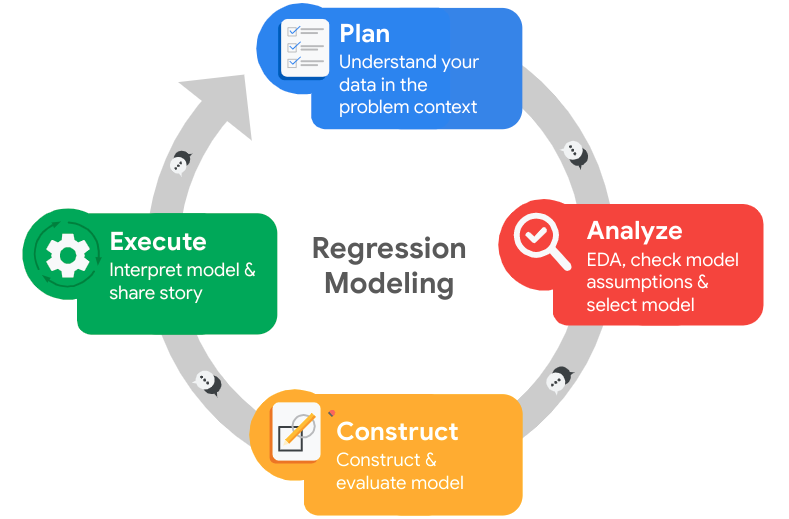

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

- Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The Human Resources of Salifort Motors.
2. Predict if an employee will leave the company and solve why.
3. The data is understandable and have good features.
4. ChatGPT, Google docs, course content, other notebooks.
5. Yes, be sure to avoid bias when performing EDA.


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [52]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from spicy import stats
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("../csv/HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df0["Department"].describe()

count     14999
unique       10
top       sales
freq       4140
Name: Department, dtype: object

In [6]:
df0["salary"].describe()

count     14999
unique        3
top         low
freq       7316
Name: salary, dtype: object

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
df0.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [8]:
# Rename columns as needed
df0 = df0.rename(columns={'average_montly_hours' : 'average_hours_worked_monthly', 'time_spend_company':'total_time_in_company', 'Department':'department', 'Work_accident':'work_accident'})

# Display all column names after the update
df0.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_hours_worked_monthly',
 'total_time_in_company',
 'work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

### Check missing values

Check for any missing values in the data.

In [9]:
df0.shape

(14999, 10)

In [10]:
# Check for missing values
df0.isna().sum()

satisfaction_level              0
last_evaluation                 0
number_project                  0
average_hours_worked_monthly    0
total_time_in_company           0
work_accident                   0
left                            0
promotion_last_5years           0
department                      0
salary                          0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates
df0.duplicated().sum()

3008

In [12]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_hours_worked_monthly,total_time_in_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_hours_worked_monthly,total_time_in_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

<Axes: ylabel='total_time_in_company'>

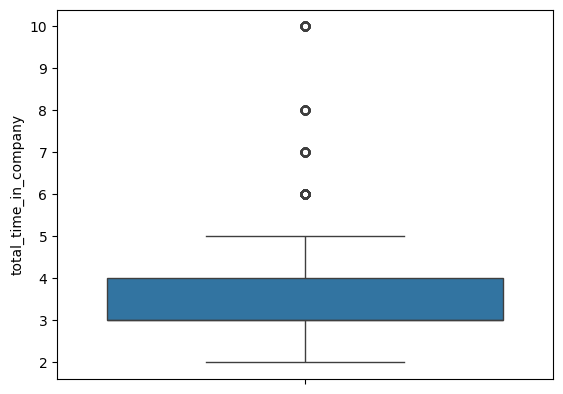

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(data=df1["total_time_in_company"])

In [15]:
# Determine the number of rows containing outliers
# Compute the 25th percentile value in `tenure`
percentile25 = df1["total_time_in_company"].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1["total_time_in_company"].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1["total_time_in_company"] > upper_limit) | (df1["total_time_in_company"] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
value_counts = df1["left"].value_counts()
# Get percentages of people who left vs. stayed
percentages = value_counts / len(df1["left"]) * 100

percentages

left
0    83.39588
1    16.60412
Name: count, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

<Axes: ylabel='number_project'>

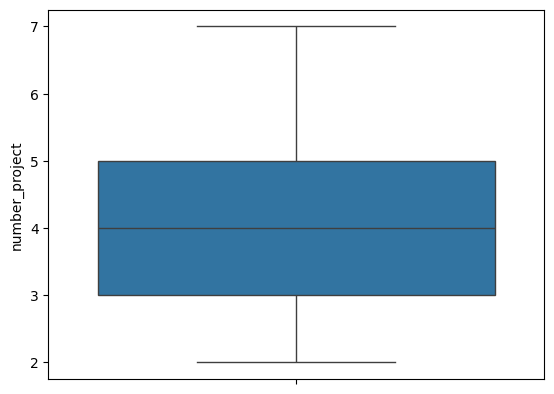

In [17]:
# Create a plot as needed
sns.boxplot(data=df1["number_project"])

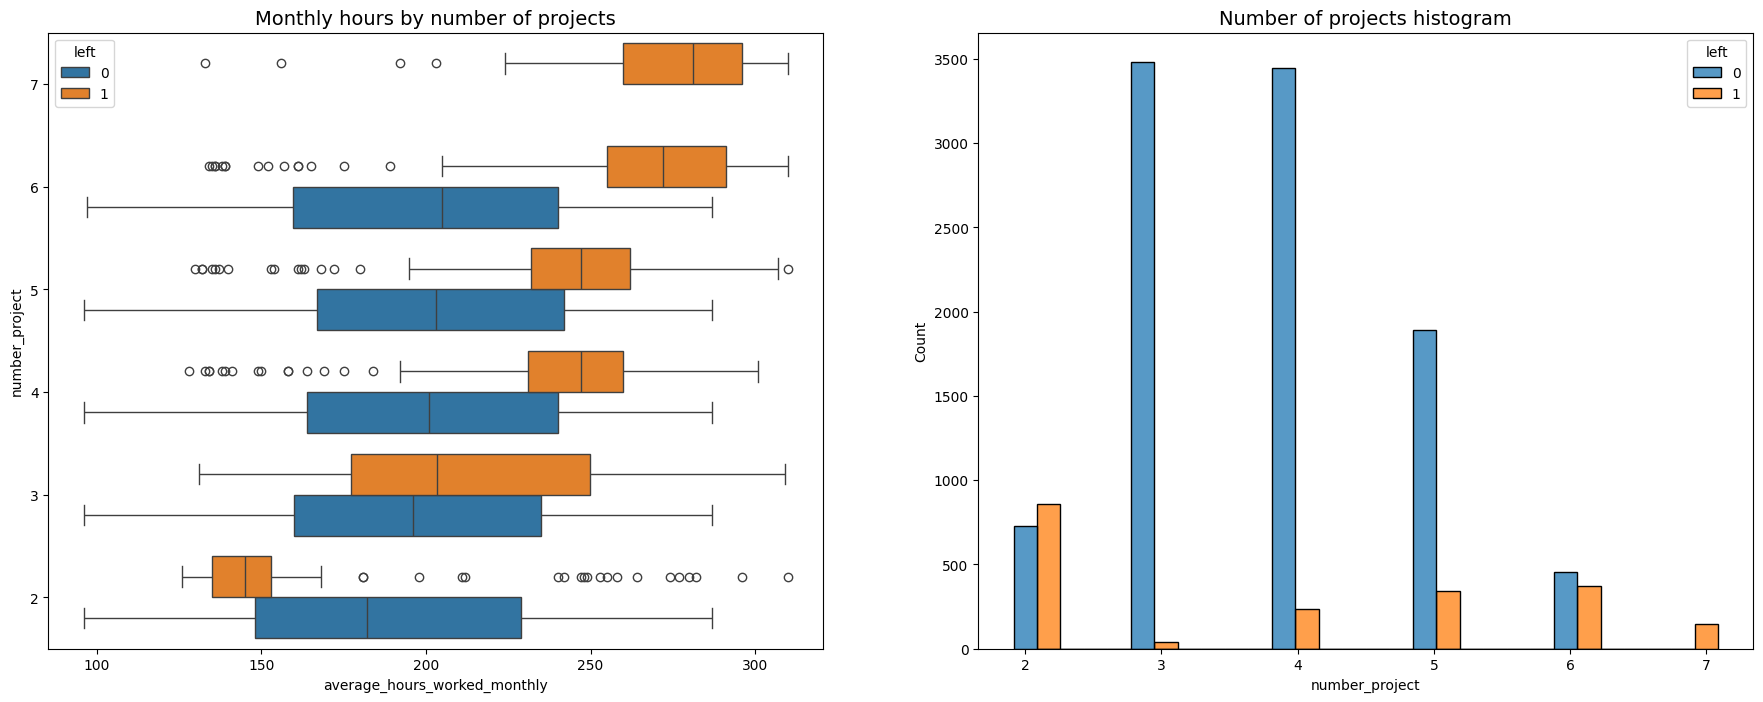

In [18]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_hours_worked_monthly', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

As the next step, you could confirm that all employees with seven projects left.

In [19]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()


left
1    145
Name: count, dtype: int64

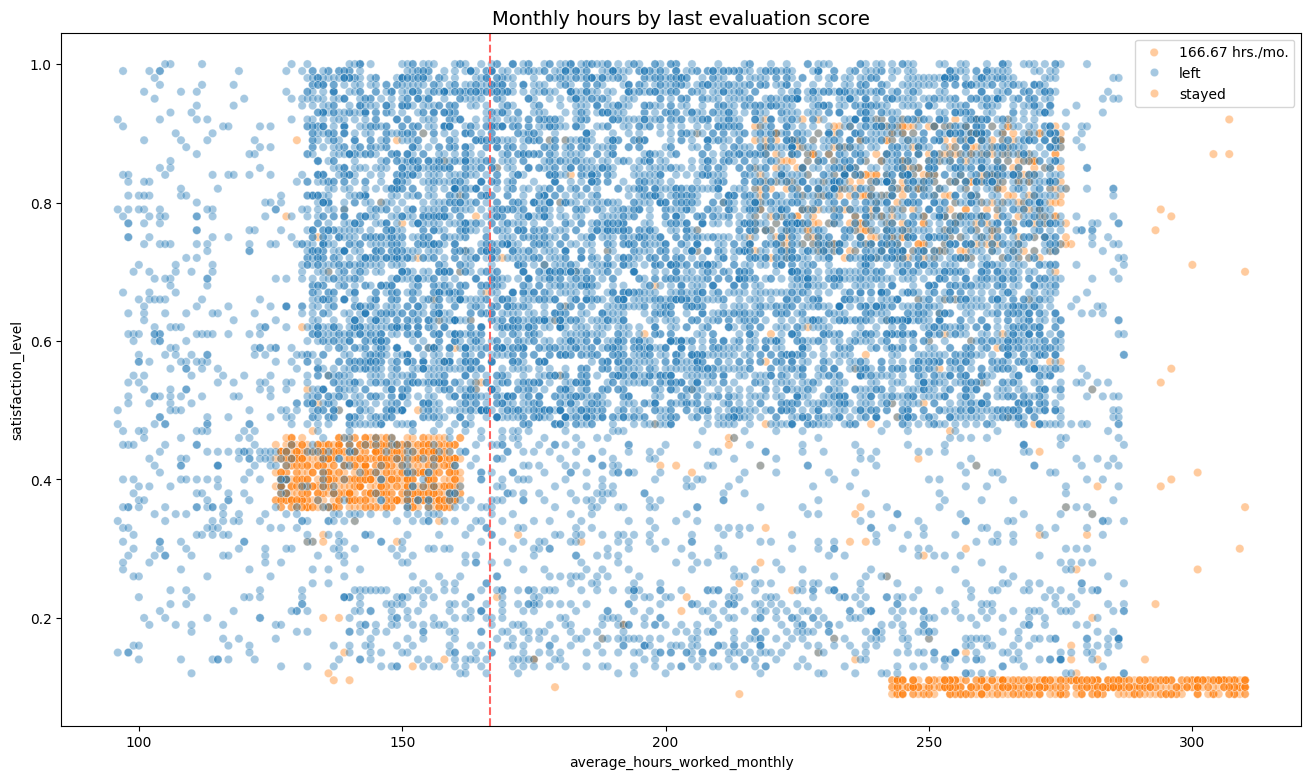

In [20]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_hours_worked_monthly', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');


The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data. 

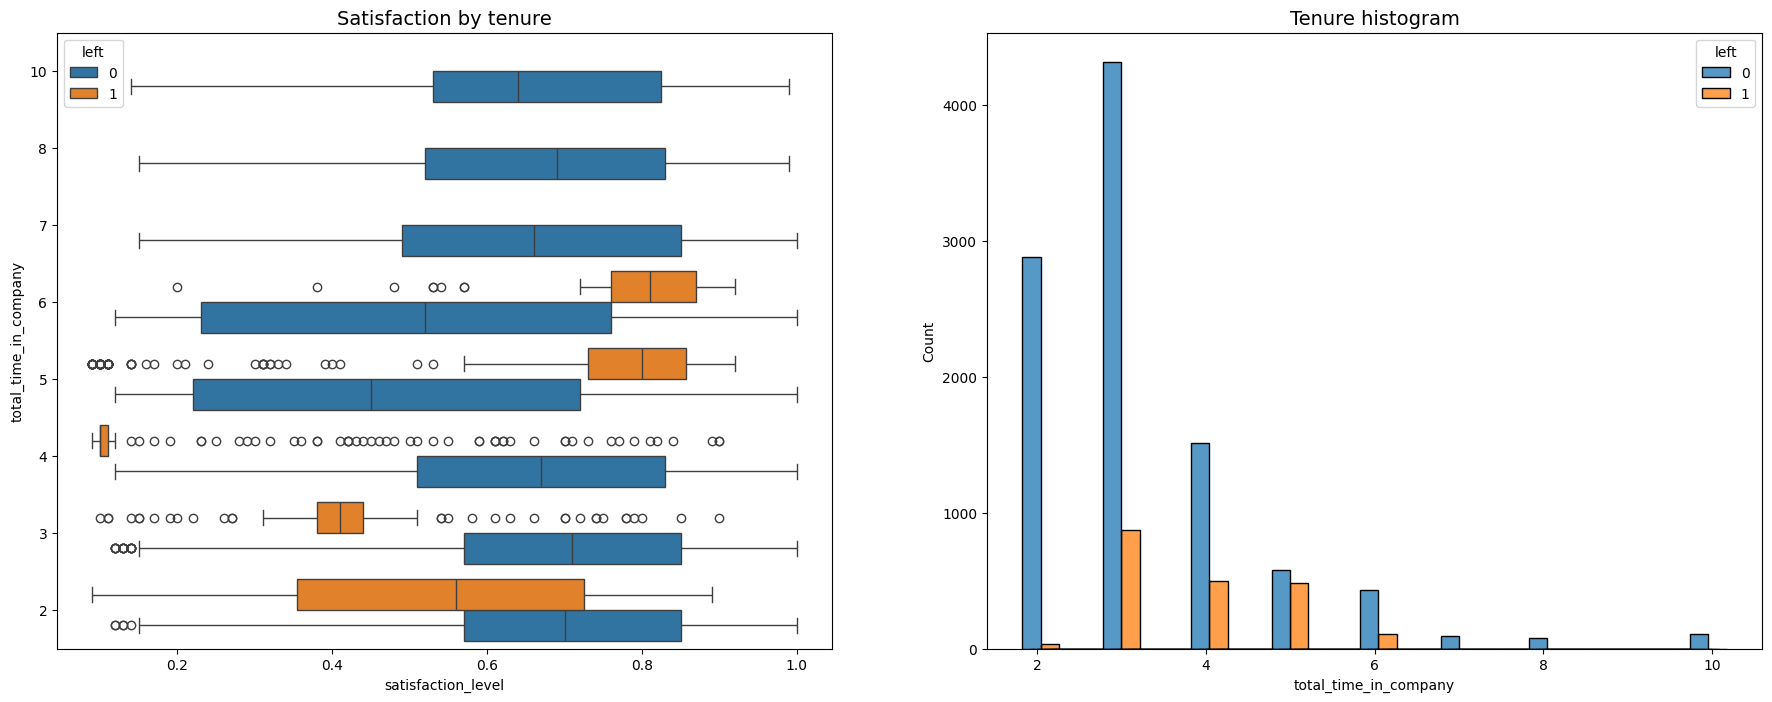

In [21]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='total_time_in_company', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['total_time_in_company']
tenure_left = df1[df1['left']==1]['total_time_in_company']
sns.histplot(data=df1, x='total_time_in_company', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();


There are many observations you could make from this plot.
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [22]:
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

C:\Users\PAULA\AppData\Local\Temp\ipykernel_11596\1804090797.py:1: FutureWarning: The provided callable <function mean at 0x00000263430D85E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])
C:\Users\PAULA\AppData\Local\Temp\ipykernel_11596\1804090797.py:1: FutureWarning: The provided callable <function median at 0x0000026343210720> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left. 

Next, you could examine salary levels for different tenures.

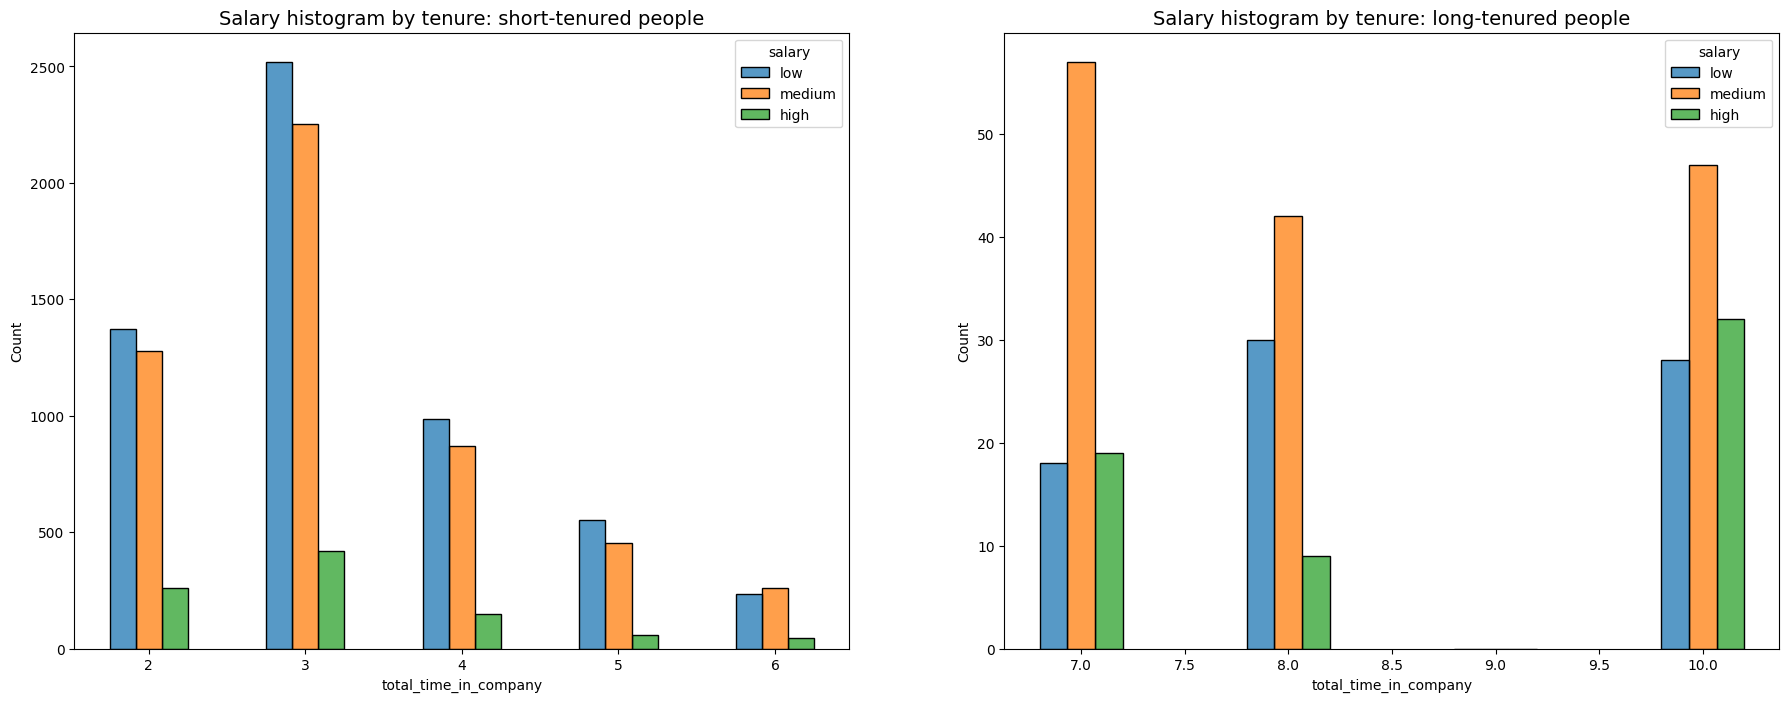

In [23]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['total_time_in_company'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['total_time_in_company'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='total_time_in_company', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='total_time_in_company', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 

Next, you could explore whether there's a correlation between working long hours and receiving high evaluation scores. You could create a scatterplot of `average_monthly_hours` versus `last_evaluation`.

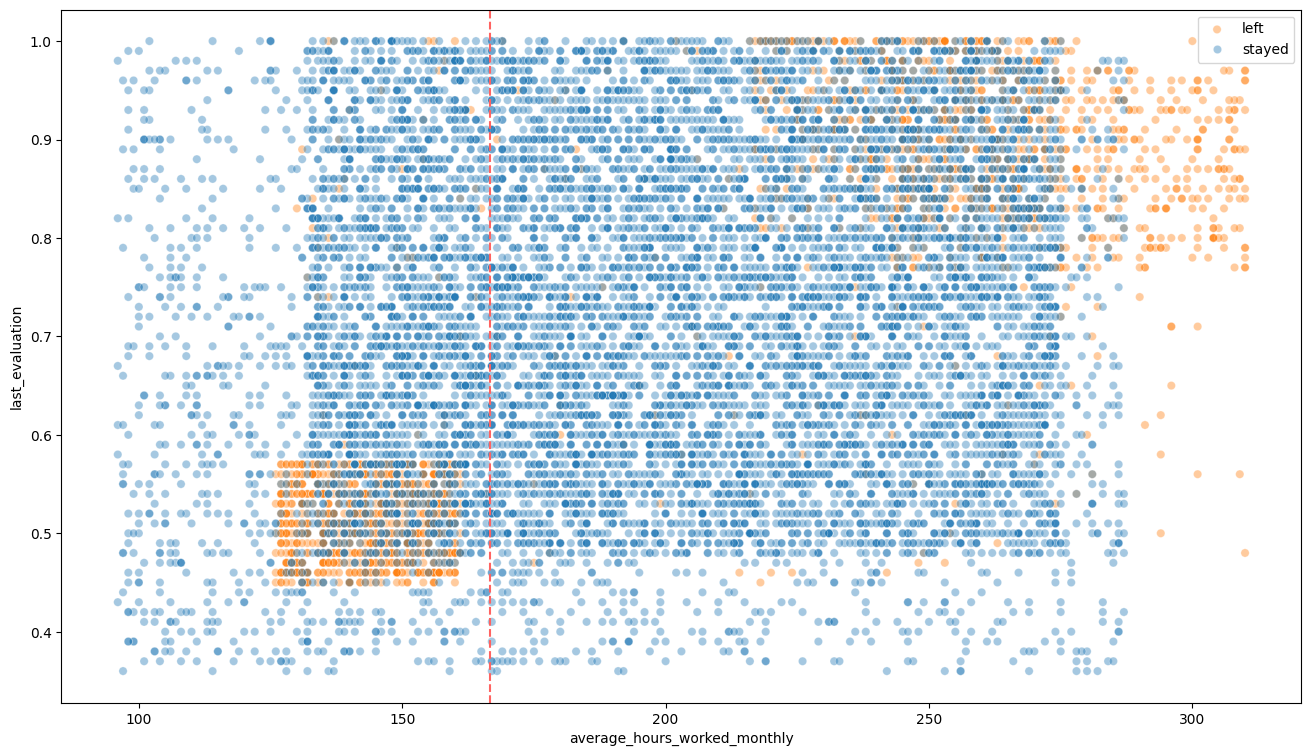

In [24]:
# Create a plot as needed 
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_hours_worked_monthly', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['left', 'stayed'])

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Next, you could examine whether employees who worked very long hours were promoted in the last five years.

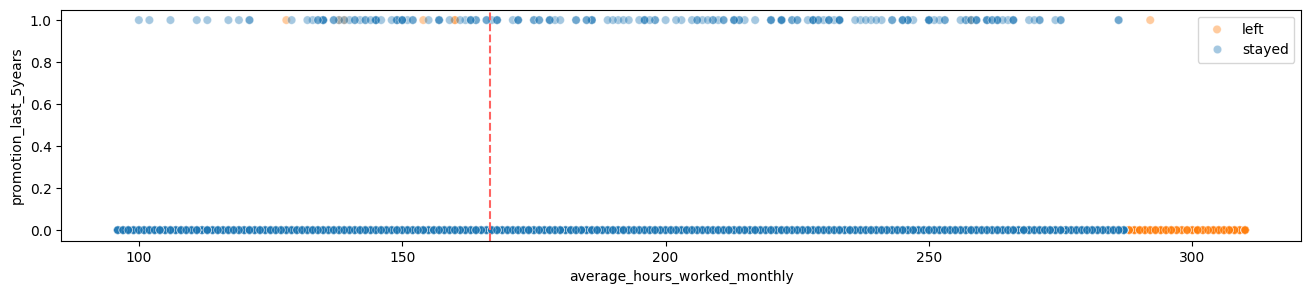

In [25]:
# Create a plot as needed 
### YOUR CODE HERE ###
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_hours_worked_monthly', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['left', 'stayed'])

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

Next, you could inspect how the employees who left are distributed across departments.

In [26]:
df1.groupby(["left"])["department"].value_counts()

left  department 
0     sales          2689
      technical      1854
      support        1509
      IT              818
      RandD           609
      product_mng     576
      marketing       561
      accounting      512
      hr              488
      management      384
1     sales           550
      technical       390
      support         312
      IT              158
      hr              113
      marketing       112
      product_mng     110
      accounting      109
      RandD            85
      management       52
Name: count, dtype: int64

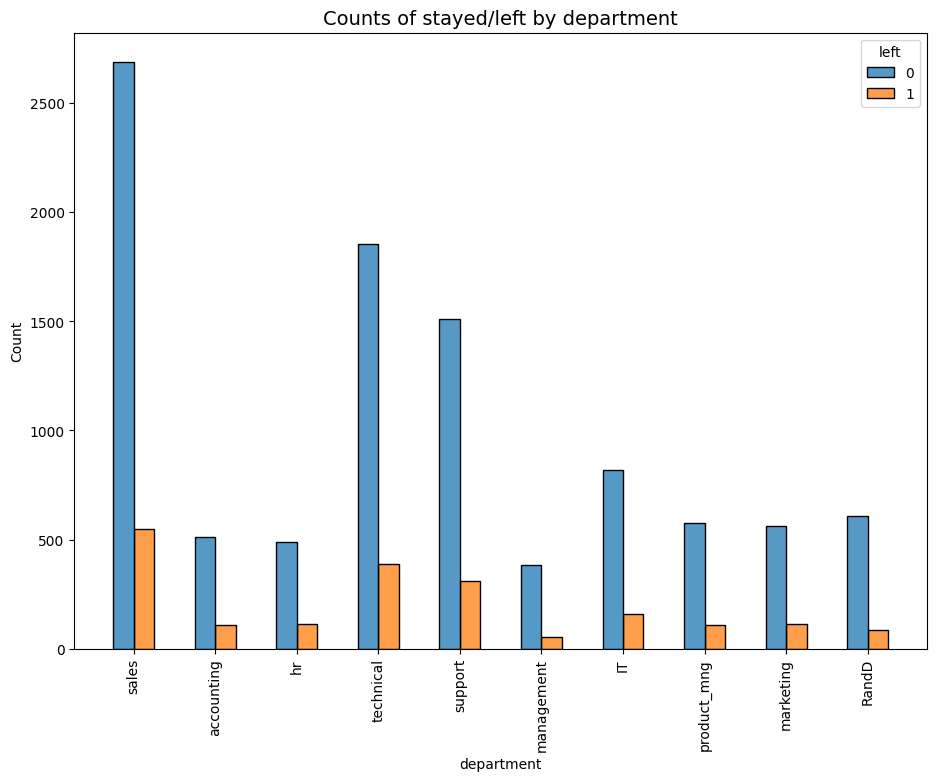

In [27]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='vertical')
plt.title('Counts of stayed/left by department', fontsize=14);


There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 

Lastly, you could check for strong correlations between variables in the data.

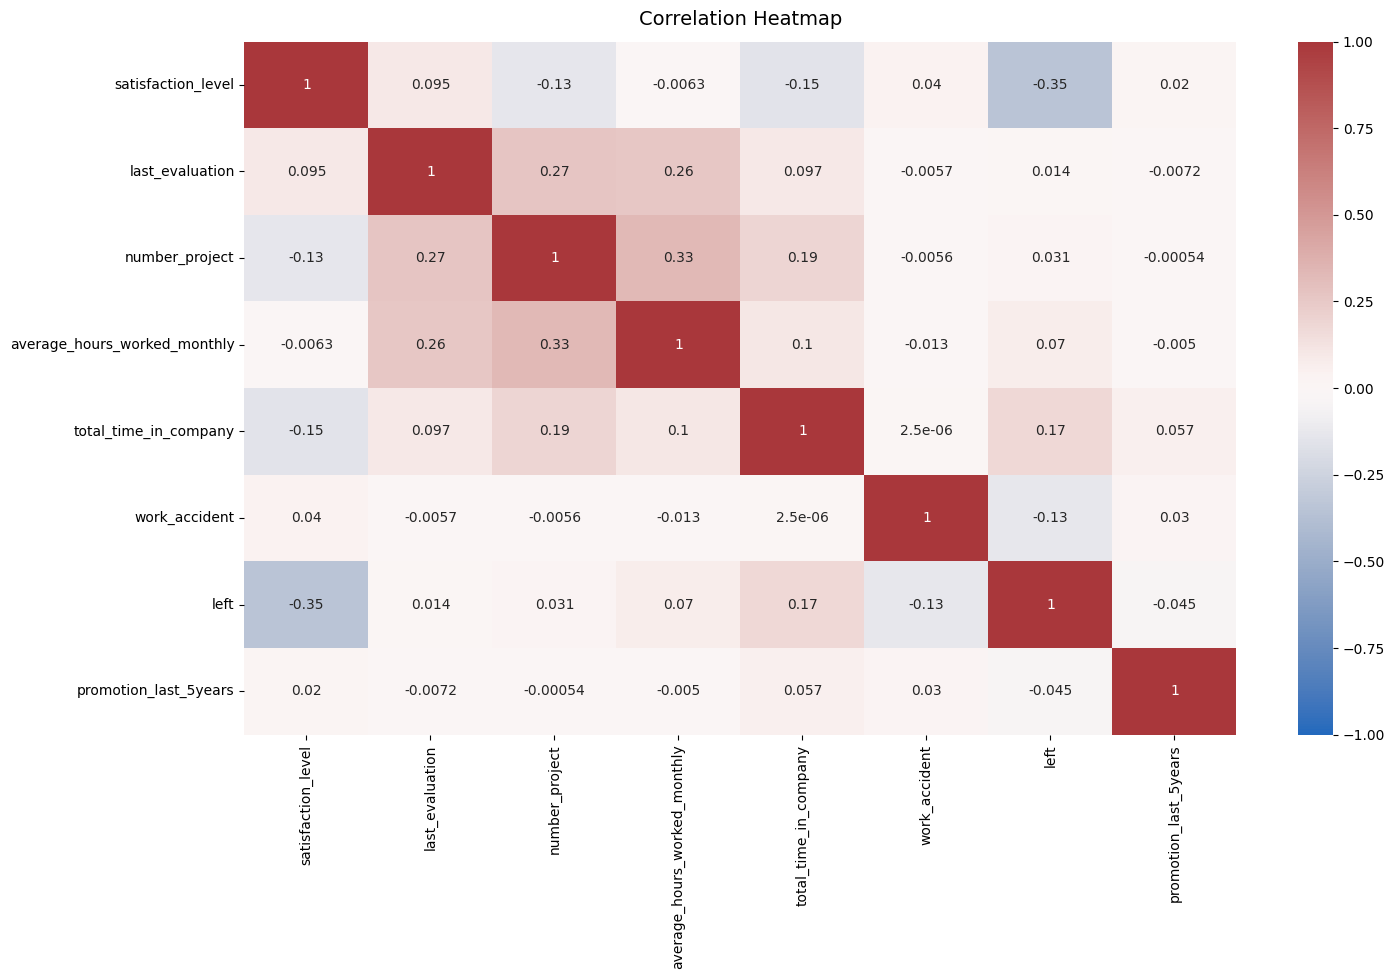

In [28]:
# Plot a correlation heatmap
numeric_df = df1.select_dtypes(include=['number'])

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. There are not a strong relationship between the features and the target variable.
2. monthly_hours_worked, number_project, last_evaluation, satisfaction_level and total_time_in_company and for our target variable left. These features were chosen because they demonstrate to have some relationship if a customer leaves.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

It is a binary prediction.

### Identify the types of models most appropriate for this task.

Logistic regression, decision tree, random forest and XGBoost.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [29]:
df1_dummies = pd.get_dummies(df1, columns=["salary", "department"], drop_first=True)

In [30]:
df1_dummies.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_hours_worked_monthly',
 'total_time_in_company',
 'work_accident',
 'left',
 'promotion_last_5years',
 'salary_low',
 'salary_medium',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_support',
 'department_technical']

In [31]:
df1_dummies["department_RandD"] = df1_dummies["department_RandD"].astype(int)
df1_dummies["department_accounting"] = df1_dummies["department_accounting"].astype(int)
df1_dummies["department_hr"] = df1_dummies["department_accounting"].astype(int)
df1_dummies["department_management"] = df1_dummies["department_management"].astype(int)
df1_dummies["department_marketing"] = df1_dummies["department_marketing"].astype(int)
df1_dummies["department_product_mng"] = df1_dummies["department_product_mng"].astype(int)
df1_dummies["department_sales"] = df1_dummies["department_sales"].astype(int)
df1_dummies["department_support"] = df1_dummies["department_support"].astype(int)
df1_dummies["department_technical"] = df1_dummies["department_technical"].astype(int)
df1_dummies["salary_low"] = df1_dummies["salary_low"].astype(int)
df1_dummies["salary_medium"] = df1_dummies["salary_medium"].astype(int)

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
#y = df1_dummies["left"]
#X = df1_dummies.drop('left',axis=1)

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,stratify=y, random_state=42)

#smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' mode balances classes
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

c:\Users\PAULA\Desktop\jose\Notebook\pydata-book\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\PAULA\Desktop\jose\Notebook\pydata-book\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [33]:
lrc = LogisticRegression(random_state=42)

In [46]:
#lrc.fit(X_train_resampled,y_train_resampled)

c:\Users\PAULA\Desktop\jose\Notebook\pydata-book\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [35]:
lrc.coef_

array([[-4.18225442e+00,  3.37710574e-01, -3.07979753e-01,
         4.13913122e-03,  2.77271289e-01, -1.36371494e+00,
        -6.10441800e-01,  1.50691170e+00,  9.98393480e-01,
        -5.46707467e-01, -3.86152999e-02, -3.86152999e-02,
        -4.71740772e-01,  1.14356704e-01,  1.14274590e-02,
        -4.12461344e-02,  4.74880443e-02, -2.25031679e-02]])

In [36]:
lrc.intercept_

array([-1.2017067])

In [47]:
#y_pred = lrc.predict(X_test)

In [48]:
print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % precision_score(y_test, y_pred))
print("Recall:", "%.6f" % recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred))

Accuracy: 0.788216
Precision: 0.419038
Recall: 0.715243
F1 Score: 0.528465


In [68]:
y = df1_dummies["left"]
X = df1_dummies.drop('left',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=10)

In [64]:
cv_params = {'n_estimators' : [300],
             'max_features': ["sqrt"],
              'max_samples' : [0.5,0.6,0.7,0.9] ,
              'max_depth' : [None],        
              'min_samples_leaf' : [0.001,0.01,1], 
              'min_samples_split' : [2, 5, 10]}

In [54]:
rf = RandomForestClassifier(random_state=42)

In [84]:
rf_val = GridSearchCV(rf, cv_params,refit='f1', scoring=['f1','recall','precision','accuracy','roc_auc'], cv=5)

In [85]:
rf_val.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.6, 0.7, 0.9],
                         'min_samples_leaf': [0.001, 0.01, 1],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [300]},
             refit='f1',
             scoring=['f1', 'recall', 'precision', 'accuracy', 'roc_auc'])

In [71]:
rf_val.best_score_

0.9516758395494579

In [72]:
rf_val.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [88]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    auc = best_estimator_results.mean_test_roc_auc


    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        'auc': [auc]
                        },
                       )

    return table

In [89]:
results = make_results('RF CV', rf_val,'f1')
results

,model,precision,recall,F1,accuracy,auc
0,RF CV,0.989927,0.916332,0.951676,0.984544,0.980542


In [75]:
rf_preds = rf_val.best_estimator_.predict(X_test)

In [76]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [77]:
rf_test_scores = get_test_scores('RF Test', rf_preds, y_test)
rf_test_scores

,model,precision,recall,F1,accuracy
0,RF Test,0.97807,0.897384,0.935992,0.979653


In [90]:
xgb = XGBClassifier(objective='binary:logistic', random_state= 0)
# 2. Create a dictionary of hyperparameters to tune
cv_params_cgb = {
    'max_depth' : [4,6],
    'min_child_weight' : [3,5],
    'learning_rate' : [0.1,0.2,0.3],
    'n_estimators' : [300]

}

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params_cgb ,scoring=['f1','recall','precision','accuracy','roc_auc'], refit='f1',cv=5)

In [91]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 1min 54s
Wall time: 16.5 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='f1',
             scoring=['f1', 'recall', 'precision', 'accuracy', 'roc_auc'])

In [92]:
xgb_cv_results = make_results('XGB', xgb_cv, 'f1')
xgb_cv_results

,model,precision,recall,F1,accuracy,auc
0,XGB,0.971735,0.919679,0.944973,0.982209,0.980411


In [81]:
xgb_preds = xgb_cv.best_estimator_.predict(X_test)

In [82]:
xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
xgb_test_scores

,model,precision,recall,F1,accuracy
0,XGB test,0.974026,0.905433,0.938478,0.98032


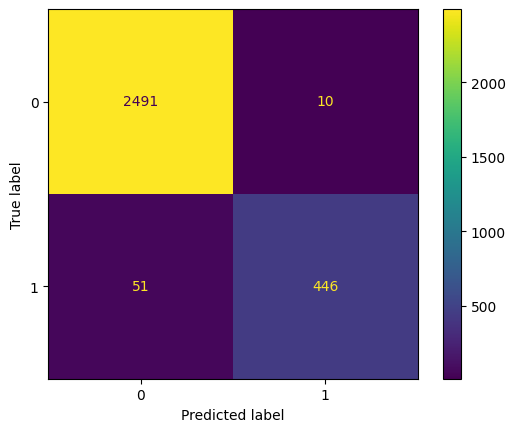

In [93]:
preds = rf_val.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf_val.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_val.classes_)
disp.plot(values_format='');

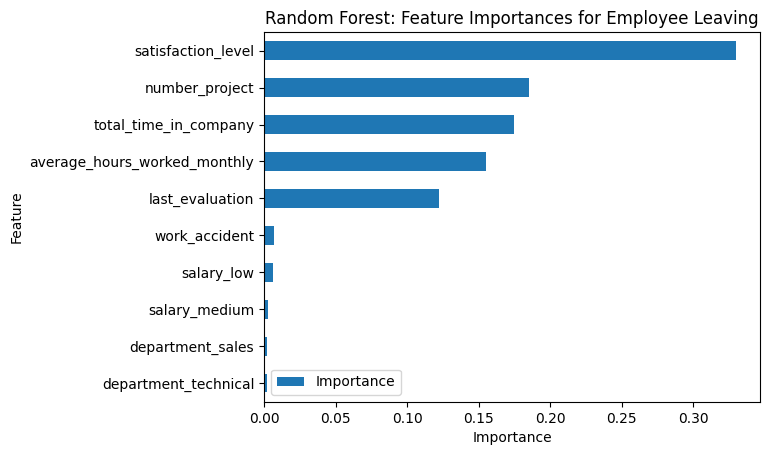

In [96]:
# Get feature importances
feat_impt = rf_val.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_val.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

## Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.